<a href="https://colab.research.google.com/github/AdamMcCloskey381/Kaggle_ML/blob/main/DataLeakage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df = pd.read_csv("/content/AER_credit_card_data.csv", delimiter = ",",
                 true_values = ["yes"], false_values = ["no"])

In [274]:
"""le = LabelEncoder()
df.owner = le.fit_transform(df.owner)
df.selfemp = le.fit_transform(df.selfemp)
df.card = le.fit_transform(df.card)"""

'le = LabelEncoder()\ndf.owner = le.fit_transform(df.owner)\ndf.selfemp = le.fit_transform(df.selfemp)\ndf.card = le.fit_transform(df.card)'

In [275]:
y = df.card
X = df.drop(columns = ["card"])

In [276]:
y.value_counts()/len(y)

True     0.775588
False    0.224412
Name: card, dtype: float64

(array([ 296.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1023.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

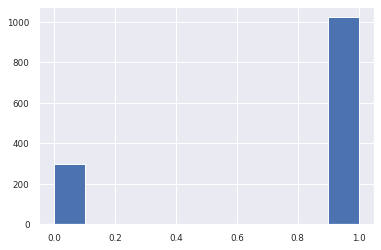

In [277]:
plt.hist([0 if y == False else 1 for y in y])

In [278]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [279]:
Pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))

cv_score = cross_val_score(Pipeline, X, y, cv=5, n_jobs=-1, scoring="accuracy")

print(f"the cross-validation accuracy was: {round(cv_score.mean(), 4)}")

the cross-validation accuracy was: 0.9811


In [280]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [282]:
Pipeline.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [283]:
pred = Pipeline.predict(X_test)

In [284]:
scores = {
    "accuracy": accuracy_score(y_test, pred),
    "f1": f1_score(y_test, pred),
    "recall": recall_score(y_test, pred),
    "precision": precision_score(y_test, pred)
}

In [285]:
scores = pd.DataFrame(data = scores.values(),
                      index = scores.keys())

In [286]:
scores.T

,accuracy,f1,recall,precision
0,0.977273,0.985075,0.970588,1.0


In [287]:
expenditures_cardholders = X.expenditure[y]
expenditures_noncardholders = X.expenditure[~y]

In [288]:
print('Fraction of those who did not receive a card and had no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))
print('Fraction of those who received a card and had no expenditures: %.3f' \
      %(( expenditures_cardholders == 0).mean()))

Fraction of those who did not receive a card and had no expenditures: 1.00
Fraction of those who received a card and had no expenditures: 0.021


In [289]:
### removing variables that might cause target data leakage

In [290]:
X = X.drop(columns = ["expenditure", "share", "active", "majorcards"])

In [291]:
cv_scores = cross_val_score(Pipeline, X, y, cv=5, n_jobs=-1)
print(f"the cross-validation accuracy average was: {round(cv_scores.mean(), 4)}")

the cross-validation accuracy average was: 0.8279
